# Magnetic Field Computation
## Biot-Savart's Law
<img src="https://github.com/nayot/emag/blob/main/pics/biot-savart.png?raw=true" alt="Image" style="width: 50%;"/>

$$\mathbf{dH}=\frac{I\mathbf{dr'}\times (\mathbf{r-r'})}{4\pi\mathbf{|r-r'|^3}}$$

สำหรับเส้นทางที่กระแสไหลที่อธิบายได้ด้วย Parametric equation $<x, y>=<x(t), y(t)>$

$$\mathbf{dr'}=\frac{\mathbf{dr'}}{dt}dt$$

ดังนั้น

$$\mathbf{H}=\oint\mathbf{dH}$$

## สนามแม่เหล็กเนื่องจากกระแสที่ไหนบนตัวนำตรง
หาสนามแม่เหล็กที่เนื่องจากกระแส $I=1~A$ ที่ไหลในตัวนำตรงยาวอนันต์ที่วางอยู่บนแนวแกน $z$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp
from scipy.integrate import dblquad
from joblib import Parallel, delayed

In [11]:
x, y, z, t = smp.symbols('x, y, z, t', real=True)
r = smp.Matrix([x, y, z])
rp = smp.Matrix([0, 0, t])
R = r - rp

dHdt = smp.diff(rp, t).cross(R) / ((4 * smp.pi) * R.norm()**3)
dHdt

Matrix([
[-y/(4*pi*(x**2 + y**2 + (t - z)**2)**(3/2))],
[ x/(4*pi*(x**2 + y**2 + (t - z)**2)**(3/2))],
[                                          0]])

In [28]:
H = smp.integrate(dHdt, (t, -smp.oo, smp.oo))
H

Matrix([
[-y/(2*pi*(x**2 + y**2))],
[ x/(2*pi*(x**2 + y**2))],
[                      0]])

In [29]:
# แปลงเป็น Numerical Function สำหรับ plot
Hxf = smp.lambdify([x, y, z], H[0])
Hyf = smp.lambdify([x, y, z], H[1])
Hzf = smp.lambdify([x, y, z], H[2])

def H(x, y, z):
    Hx = Hxf(x, y, z) 
    Hy = Hyf(x, y, z) 
    Hz = Hzf(x, y, z)
    return np.array([Hx, Hy, Hz])

H(1, 1, 1)

array([-0.07957747,  0.07957747,  0.        ])

<Axes: xlabel='x', ylabel='y'>

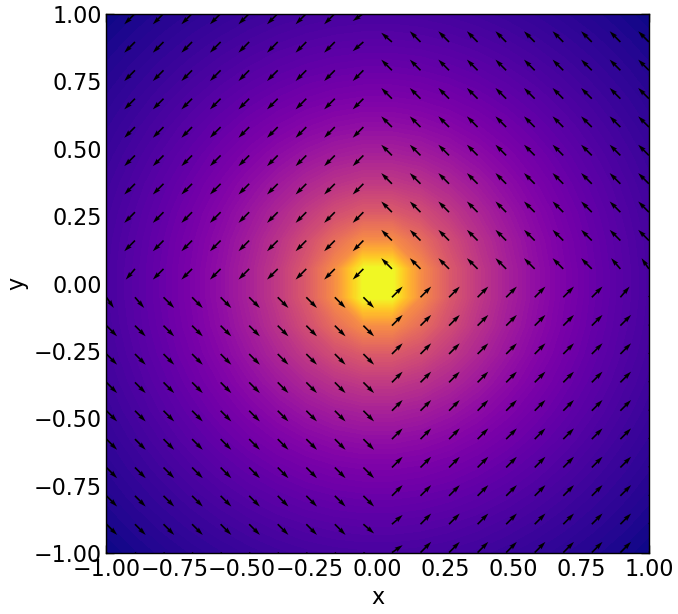

In [41]:
def H2D(x, y):
    return H(x, y, 0.)[:2]

plt.figure(figsize=(7,7))
field_plot(H2D, x_min=-1, x_max=1, y_min=-1, y_max=1, num_grids=20, contour=True)